## Description of Adaboost

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights w_1, w_2, ..., w_N to each of the training samples. Initially, those weights are all set to w_i = 1/N, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.

AdaBoost的核心原则是在**数据的重复修改版本上适合一系列弱学习者（即，仅仅稍等于随机猜测的模型，如小决策树），然后将所有这些预测通过加权多数表决（或总和）合并，以产生最终预测。**在每个所谓的增强迭代中的数据修改包括将权重w_1，w_2，...，w_N应用于每个训练样本。最初，这些权重都设置为w_i = 1 / N，所以第一步只是简单地训练原始数据的弱学习者。对于每个连续的迭代，样本权重被单独修改，并且将学习算法重新应用于重新加权的数据。在给定的步骤中，由前一步骤诱发的增强模型错误预测的训练样本的权重增加，而正确预测的训练样本的权重则会降低。随着迭代的进行，难以预测的示例将会受到越来越大的影响。因此，每个随后的弱小的学习者被迫集中在序列中被先前错过的例子。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import glob

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from pandas import DataFrame
%matplotlib inline

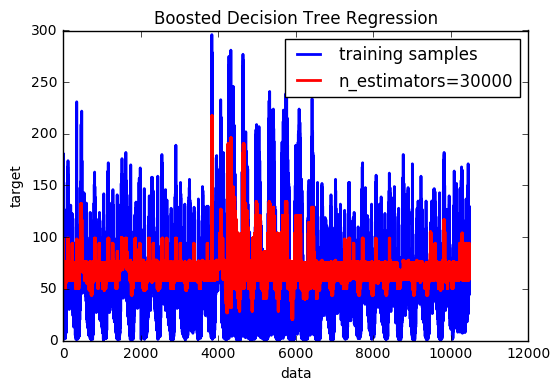

In [2]:
#input the dataset
volume = pd.read_csv('big_trainset_task2_version2.csv')
volume_new = volume.drop(['time_window','volume'],axis=1).values

length_volume = len(volume['volume'])
x = DataFrame(range(1,length_volume+1),columns=['x'])
x[-5:-1]
volume_new[0:5]
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=30000, random_state=np.random.RandomState(1))

regr_1.fit(volume_new, volume[u'volume'])
regr_2.fit(volume_new, volume[u'volume'])

# Predict
y_1 = regr_1.predict(volume_new)
y_2 = regr_2.predict(volume_new)

# Plot the results
plt.figure()
plt.plot(x, volume[u'volume'], c='b', label="training samples",linewidth=2)
#plt.plot(x, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(x, y_2, c="r", label="n_estimators=30000", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")

plt.legend()
plt.show()

In [5]:
length_volume = len(volume['volume'])
length_volume

10483

In [4]:
np.array(volume_new)

array([[  1. ,   0. ,   0. , ...,  22.2,  76. ,   0. ],
       [  1. ,   1. ,   0. , ...,  22.2,  76. ,   0. ],
       [  2. ,   0. ,   0. , ...,  22.2,  76. ,   0. ],
       ..., 
       [  2. ,   0. ,   0. , ...,  21. ,  91. ,   0. ],
       [  3. ,   0. ,   0. , ...,  21. ,  91. ,   0. ],
       [  3. ,   1. ,   0. , ...,  21. ,  91. ,   0. ]])

MAPE

In [8]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [23]:
MAPE_regr_1=[]
for i in range(0,48):
    MAPE_regr_1.append(MAPE(volume[u'volume'],regr_1_list[i]))
x_list_tem=[]

for i in range(len(MAPE_regr_1)):
    x_list_tem.append(i)

decisison tree regressor

In [6]:
regr_1_list=[]
for i in range(1,50):
    regr_1_list.append(DecisionTreeRegressor(max_depth=i).fit(volume_new, volume[u'volume']).predict(volume_new))

Plot the result, x for the max_depth, y for the MAPE:

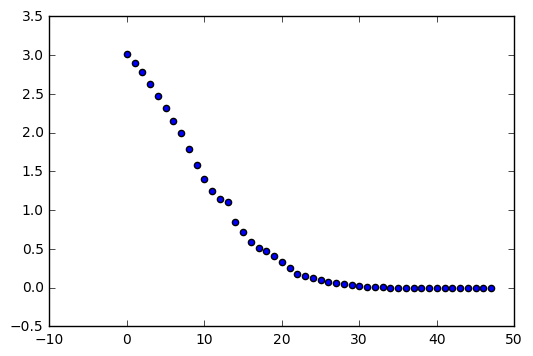

In [41]:
i_list=[]
j_list=[]
for i,j in enumerate(MAPE_regr_1):
    i_list.append(i)
    j_list.append(j)

plt.scatter(i_list,j_list)
plt.show()

Adaboost

In [ ]:
regr_2_list=[] 
for depth in range(1,10):
    regr_2_list.append(AdaBoostRegressor(DecisionTreeRegressor(max_depth=depth),n_estimators=30000, random_state=np.random.RandomState(1)).fit(volume_new, volume[u'volume']).predict(volume_new))

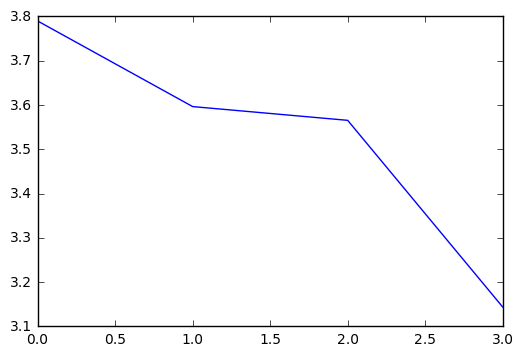

In [51]:
i_list=[]
j_list=[]
MAPE_regr_2=[]
for i in range(0,len(regr_2_list)):
    MAPE_regr_2.append(MAPE(volume[u'volume'],regr_2_list[i]))

for i,j in enumerate(MAPE_regr_2):
    i_list.append(i)
    j_list.append(j)

plt.plot(i_list,j_list)
plt.show()

The `n_estimators` is 30000

In [41]:
MAPE(volume[u'volume'],y_1)

2.627802115903838

In [6]:
MAPE(volume[u'volume'],y_2)

3.1439032027154195

The `n_estimators` is 3000

In [28]:
MAPE(volume[u'volume'],y_2)

3.1124855858346967

In [10]:
# -*- coding: utf-8 -*-
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
train = pd.read_csv('train_kxy\\tollgate3_1.csv').set_index(['tollgate_id','time_window','direction'])

In [12]:
train.columns

Index([u'Unnamed: 0', u'volume', u'Friday', u'Monday', u'Saturday', u'Sunday',
       u'Thursday', u'Tuesday', u'Wednesday', u'hour__0', u'hour__1',
       u'hour__2', u'hour__3', u'hour__4', u'hour__5', u'hour__6', u'hour__7',
       u'hour__8', u'hour__9', u'hour__10', u'hour__11', u'hour__12',
       u'hour__13', u'hour__14', u'hour__15', u'hour__16', u'hour__17',
       u'hour__18', u'hour__19', u'hour__20', u'hour__21', u'hour__22',
       u'hour__23', u'X0', u'X20', u'X40', u'holiday', u'pressure',
       u'sea_pressure', u'wind_direction', u'wind_speed', u'temperature',
       u'rel_humidity', u'precipitation'],
      dtype='object')

In [13]:
train.shape

(2169, 44)

In [15]:
# test = pd.read_csv('big_testset_task2_version2.csv').set_index(['tollgate_id','time_window','direction'])
# test.columns
X_train = train.drop('volume',axis=1).values[0:2000]
X_test = train.drop('volume',axis=1).values[-170:-1]
Y_test = train['volume'].values[-170:-1]

In [17]:
#X_test = test.drop('volume',axis=1).values
y = train.volume.values[0:2000]
LR.fit(X_train, y)
Y_predict = LR.predict(X_test)

# test['volume'].reset_index().to_csv('LRtask2.csv',index = False)
# test[u'volume']

In [18]:
MAPE(Y_test,Y_predict)

0.59654283539472863